In [2]:
import base64
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yaml

from dateutil import relativedelta

In [3]:
url = "https://docs.google.com/spreadsheets/d/1RblHxOcXIFd2tg4P7cHtZNuElin5ifOHt_0KawkYU7A/export?format=csv&id=1RblHxOcXIFd2tg4P7cHtZNuElin5ifOHt_0KawkYU7A"
df = (pd.read_csv(url).fillna(''))
df

,id,sample_id,sample_link,type,type_of_data,target,sequencing_technique,published_date,publication,publication_link,dataset_link_1,dataset_link_2,beer,country,brewery,beer_id,study_id
0,4,mgm4545634.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,https://peerj.com/articles/479/,,,,,,,
1,4,mgm4545636.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,https://peerj.com/articles/479/,,,,,,,
2,4,mgm4545637.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,https://peerj.com/articles/479/,,,,,,,
3,4,mgm4545638.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,https://peerj.com/articles/479/,,,,,,,
4,4,mgm4545639.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,https://peerj.com/articles/479/,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,14,SRR8267009,https://www.ebi.ac.uk/ena/browser/view/SRR8267009,Wine,Amplicon,ITS,Illumina,February 2020,Microbial Diversity and Metabolite Profiles of...,,,,,,,,
761,14,SRR8267010,https://www.ebi.ac.uk/ena/browser/view/SRR8267010,Wine,Amplicon,ITS,Illumina,February 2020,Microbial Diversity and Metabolite Profiles of...,,,,,,,,
762,14,SRR8267011,https://www.ebi.ac.uk/ena/browser/view/SRR8267011,Wine,Amplicon,ITS,Illumina,February 2020,Microbial Diversity and Metabolite Profiles of...,,,,,,,,
763,14,SRR8267012,https://www.ebi.ac.uk/ena/browser/view/SRR8267012,Wine,Amplicon,ITS,Illumina,February 2020,Microbial Diversity and Metabolite Profiles of...,,,,,,,,


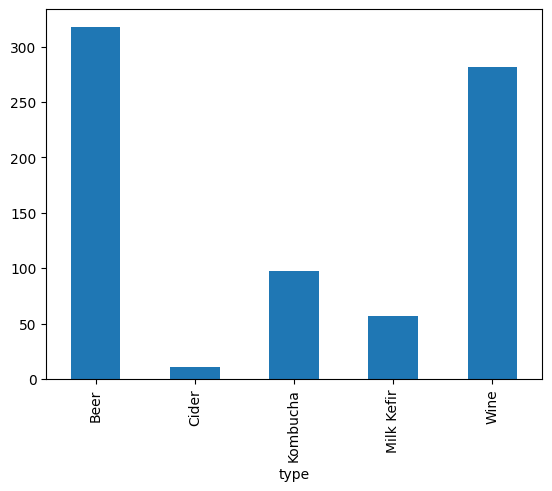

In [4]:
df_sample_count = df.groupby(['type'])['type'].count().plot.bar()

type_of_data  Amplicon  Shotgun
type                           
Beer             317.0      1.0
Cider             11.0      NaN
Kombucha          56.0     41.0
Milk Kefir        37.0     20.0
Wine             262.0     20.0


<AxesSubplot: xlabel='type'>

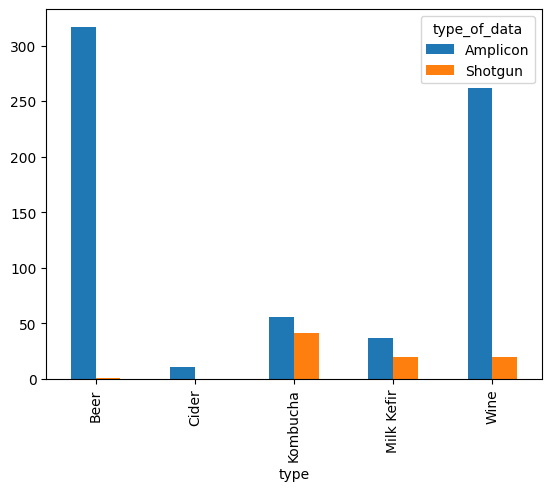

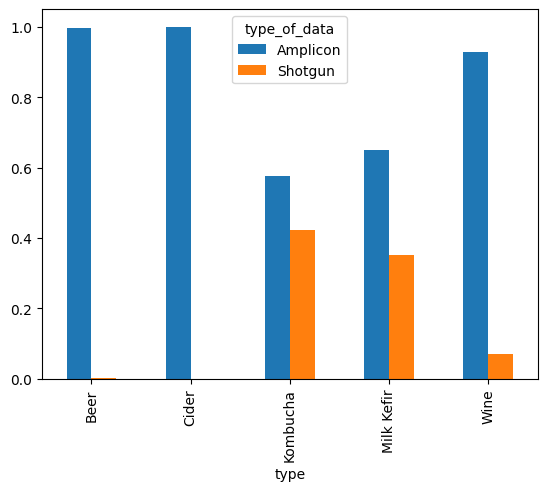

In [5]:
df_techniques = df.groupby(['type', 'type_of_data'])['id'].count().unstack('type_of_data')
print(df_techniques)
df_techniques.plot.bar()
df_techniques_freq = df_techniques.divide(df_techniques.sum(axis=1), axis=0)
df_techniques_freq.plot(kind="bar")

target        16S  26S  28S    ITS
type                              
Beer        119.0  NaN  NaN  198.0
Cider         6.0  NaN  NaN    5.0
Kombucha     28.0  NaN  NaN   28.0
Milk Kefir   20.0  NaN  2.0   15.0
Wine        117.0  6.0  NaN  139.0


<AxesSubplot: xlabel='type'>

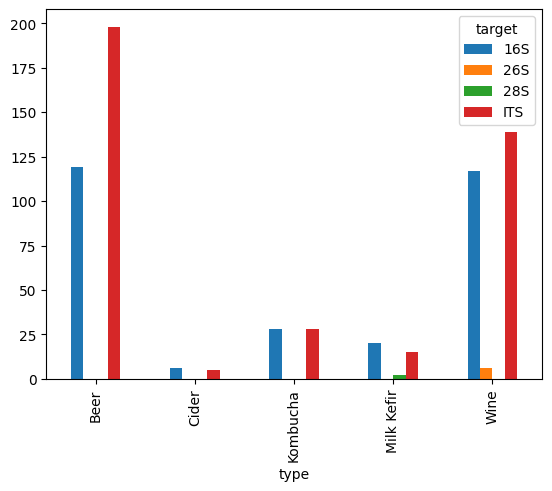

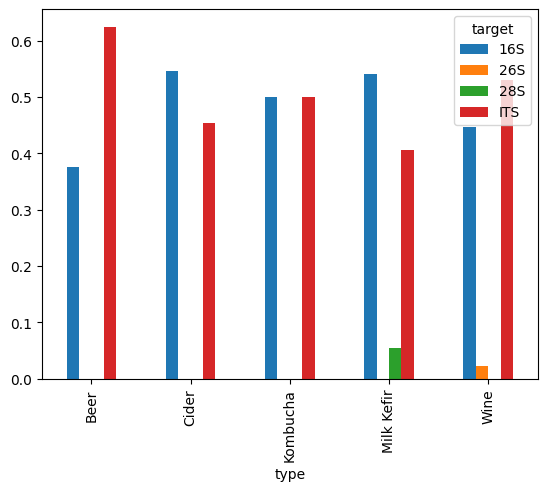

In [6]:
df_amplicon = df[df.type_of_data == 'Amplicon']

df_target = df_amplicon.groupby(['type', 'target'])['id'].count().unstack('target')
print(df_target)

df_target.plot.bar()

df_target_freq = df_target.divide(df_target.sum(axis=1), axis=0)
df_target_freq.plot(kind="bar")

In [7]:
df_bac = df[df.publication == 'BeerDeCoded: the open beer metagenome project']
print(len(df_bac))
df_bac_ITS = df_bac[df_bac.target=='ITS']
df_bac_ITS = df_bac_ITS.reset_index()
print(len(df_bac_ITS))
for index, row in df_bac_ITS.iterrows():
    print(f"{row['sample_id']}_{index+1}_L001_R1_001.fastq.gz {row['dataset_link_1']}")
    if row['dataset_link_2']:
        print(f"{row['sample_id']}_{index+1}_L001_R2_001.fastq.gz {row['dataset_link_2']}")

39
39
SRR5740340_1_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/000/SRR5740340/SRR5740340_1.fastq.gz
SRR5740340_1_L001_R2_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/000/SRR5740340/SRR5740340_2.fastq.gz
SRR5740341_2_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/001/SRR5740341/SRR5740341_1.fastq.gz
SRR5740341_2_L001_R2_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/001/SRR5740341/SRR5740341_2.fastq.gz
SRR5740342_3_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/002/SRR5740342/SRR5740342_1.fastq.gz
SRR5740342_3_L001_R2_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/002/SRR5740342/SRR5740342_2.fastq.gz
SRR5740343_4_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/003/SRR5740343/SRR5740343_1.fastq.gz
SRR5740343_4_L001_R2_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/003/SRR5740343/SRR5740343_2.fastq.gz
SRR5740344_5_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/004/SRR5740344

In [8]:
df_bac_16S = df_bac[df_bac.target=='16S']
print(len(df_bac_16S))
df_bac_16S = df_bac_16S.reset_index()
for index, row in df_bac_16S.iterrows():
    print(f"{row['sample_id']}_{index+1}_L001_R1_001.fastq.gz {row['dataset_link_1']}")
    if row['dataset_link_2']:
        print(f"{row['sample_id']}_{index+1}_L001_R2_001.fastq.gz {row['dataset_link_2']}")

0


In [9]:
df_beer = df[df.type == 'Beer']
df_beer = df_beer[df_beer.id != 4]
df_beer.to_json('db.json', orient='records')
print(len(df_beer))

301


In [10]:
import json

with open('db.json') as f:
    db_json = json.load(f)
    print(len(db_json))
    for ob in db_json:
        ob['dataset_links'] = []
        if(ob['dataset_link_1']!=None):
            if(len(ob['dataset_link_1'])!= 0):
                ob['dataset_links'].append(ob['dataset_link_1'])
            del(ob['dataset_link_1'])
        if(ob['dataset_link_2']!=None):
            if(len(ob['dataset_link_2'])!= 0):
                ob['dataset_links'].append(ob['dataset_link_2'])
            del(ob['dataset_link_2'])

with open('db_ready.json', 'w') as f:
    json.dump(db_json, f)

print(db_json)

301
[{'id': 26, 'sample_id': 'SRR11032273', 'sample_link': 'https://www.ebi.ac.uk/ena/browser/view/SRR11032273', 'type': 'Beer', 'type_of_data': 'Amplicon', 'target': '16S', 'sequencing_technique': 'Illumina ', 'published_date': 'June 2020', 'publication': 'Bacterial and Fungal Dynamics During the Fermentation Process of Sesotho, a Traditional Beer of Southern Africa', 'publication_link': 'https://www.frontiersin.org/articles/10.3389/fmicb.2020.01451/full', 'beer': 'Sesotho ', 'country': 'Lesotho', 'brewery': 'Thaba-Tseka', 'beer_id': 'HN5', 'study_id': 'PRJNA605088', 'dataset_links': ['ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/073/SRR11032273/SRR11032273_1.fastq.gz', 'ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/073/SRR11032273/SRR11032273_2.fastq.gz']}, {'id': 26, 'sample_id': 'SRR11032274', 'sample_link': 'https://www.ebi.ac.uk/ena/browser/view/SRR11032274', 'type': 'Beer', 'type_of_data': 'Amplicon', 'target': '16S', 'sequencing_technique': 'Illumina ', 'published_date': 'June 2020', 